In [2]:
import skimage
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import plotly.express as px
from skimage.color import rgb2lab, lab2rgb, rgb2hsv, hsv2rgb
from scipy.spatial.distance import pdist, squareform
import networkx as nx
from sklearn.feature_extraction import grid_to_graph


In [45]:
img_path = "sample_images/DSC04684.jpg"

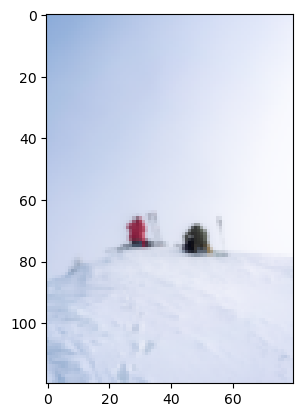

In [46]:
img = skimage.io.imread(img_path)
factor = 50
img_small = (255*skimage.transform.rescale(img, scale=1/factor, anti_aliasing=True,channel_axis=-1)).astype(np.uint8)
img_smallV = img_small.reshape((-1,3))
plt.imshow(img_small)
perceptual = rgb2lab(img_smallV)

# KMeans

In [47]:
kmeans = KMeans(n_clusters=10, n_init=1).fit(perceptual, sample_weight=rgb2hsv(lab2rgb(perceptual))[:,1])

(array([1451., 1181., 2330.,   53.,  298.,   35., 2071.,  744., 1393.,
          44.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

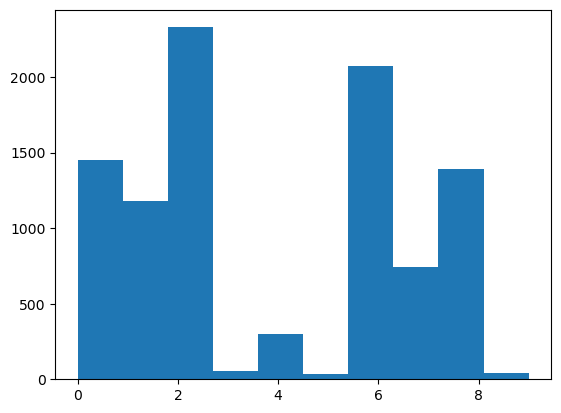

In [48]:
plt.hist(kmeans.labels_, bins=kmeans.n_clusters)

In [49]:
def plot_palette(img, colors):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,10), gridspec_kw={'width_ratios':(1,.25)})
    axs[0].imshow(img)
    axs[0].axis('off')
    axs[1].imshow(colors.reshape((10,1,3)).astype(np.uint8), aspect=.3)
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()
    return fig, axs

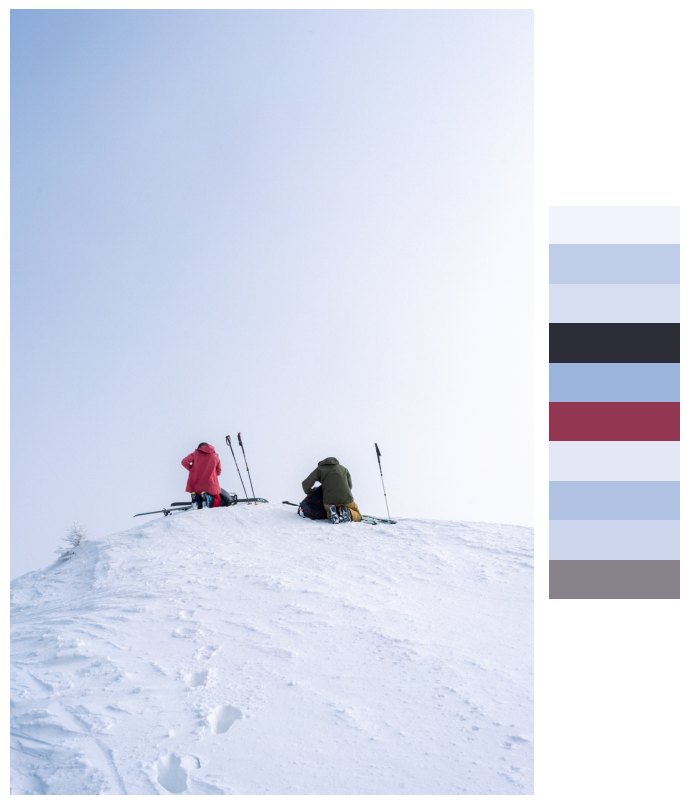

(<Figure size 700x1000 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >], dtype=object))

In [50]:
plot_palette(img, (255*lab2rgb(kmeans.cluster_centers_)).astype(np.uint8))

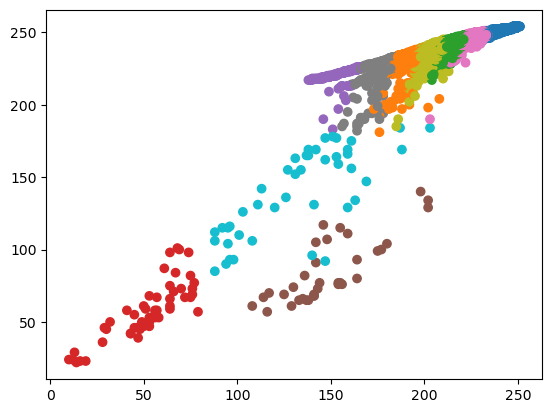

In [51]:
plt.scatter(img_smallV[:,0], img_smallV[:,2], c=kmeans.labels_, cmap='tab10')

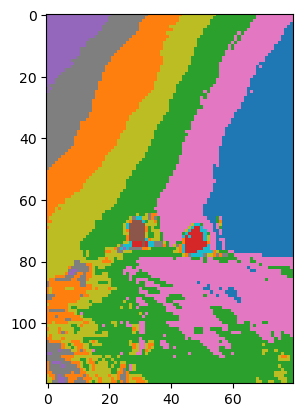

In [52]:
plt.imshow(kmeans.labels_.reshape(img_small.shape[:2]),cmap='tab10')

# Agglomerative Clustering

In [53]:
agglo = AgglomerativeClustering(n_clusters=10, linkage='average').fit(X=perceptual)

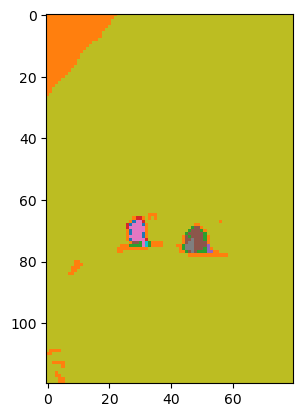

In [54]:
plt.imshow(agglo.labels_.reshape(img_small.shape[:2]), cmap='tab10')

In [55]:
from scipy import spatial
agglo_colors = np.empty((10,3))
for i,label in enumerate(np.unique(agglo.labels_)):
    cluster = perceptual[agglo.labels_==label,:]
    cluster_center = np.mean(cluster, axis=0)
    agglo_colors[i,:] = cluster_center
    

(array([8.00e+00, 4.25e+02, 2.20e+01, 6.00e+00, 4.00e+00, 3.60e+01,
        2.70e+01, 1.00e+01, 9.06e+03, 2.00e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

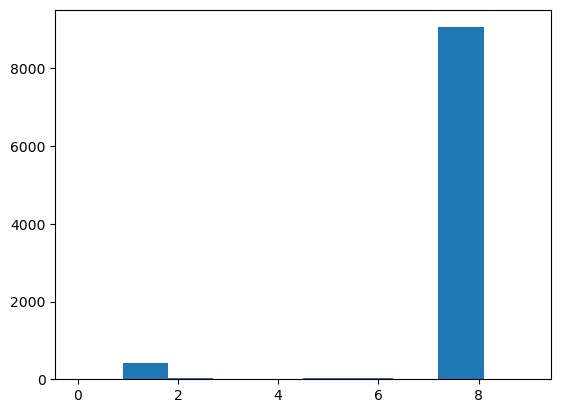

In [56]:
plt.hist(agglo.labels_, bins=agglo.n_clusters)

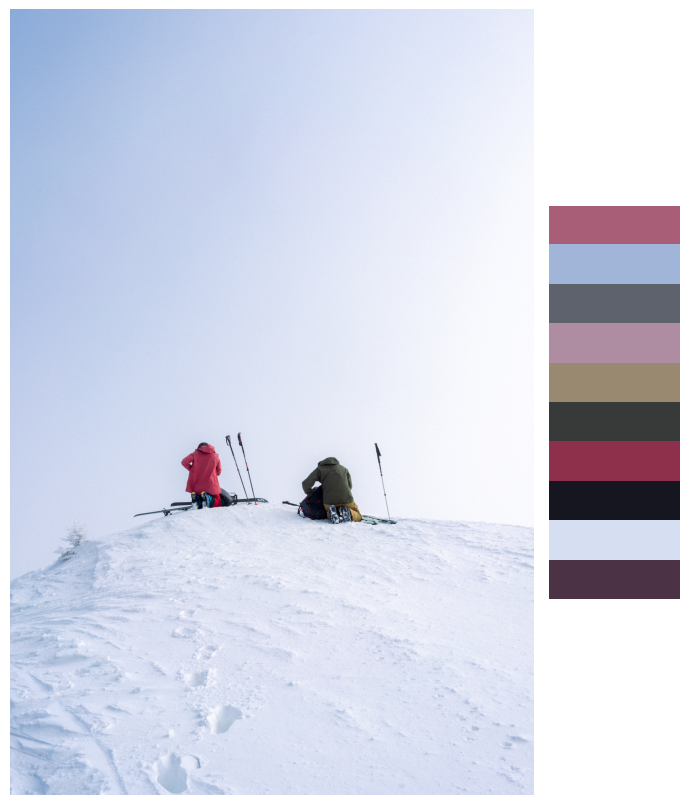

(<Figure size 700x1000 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >], dtype=object))

In [57]:
plot_palette(img, (255*lab2rgb(agglo_colors)).astype(np.uint8))

In [58]:
palette = (255*lab2rgb(agglo_colors)).astype(np.uint8)

In [59]:
sort_hue = np.argsort(rgb2hsv(palette)[:,0])

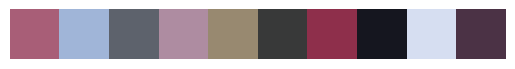

In [60]:
plt.imshow(palette.reshape(1,10,3))
plt.axis('off')
plt.show()

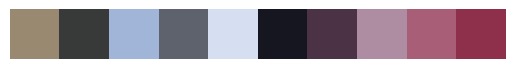

In [61]:
plt.imshow(palette[sort_hue,:].reshape((1,10,3)))
plt.axis('off')
plt.show()

In [62]:
def tsp_sort(palette_rgb):
    tsp = nx.approximation.traveling_salesman_problem
    dist_mat = squareform(pdist(rgb2lab(palette_rgb)))
    target_nodes = np.unravel_index(dist_mat.argmax(), dist_mat.shape)
    graph = nx.from_numpy_array(dist_mat)
    return tsp(graph,cycle=False)

In [63]:
sort_tsp = tsp_sort(palette)

In [64]:
sort_tsp

[8, 1, 2, 5, 7, 9, 6, 0, 3, 4]

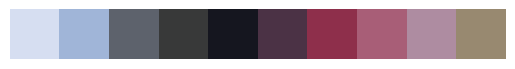

In [65]:
plt.imshow(palette[sort_tsp,:].reshape((1,10,3)))
plt.axis('off')
plt.show()